In [2]:
import numpy as np
import pandas as pd
import sklearn.svm as svm
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
a = pd.read_csv('..\Heart_Disease.csv')

In [2]:
heart_data = pd.read_csv('..\Heart_Disease.csv')
heart_data['target'] = heart_data['target'].apply(func=lambda x: -1 if x == 0 else 1)
print('data size: ', heart_data.shape)
heart_data.head()

data size:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
features_1 = heart_data.columns.to_list()
features_1.remove('target')

X = heart_data[features_1]
y = heart_data['target']

In [5]:
cv_scores = [[], [], []]
skf = StratifiedKFold(shuffle=True, random_state=2023)
models = {}



for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f' FOLD {fold + 1} '.center(50, '-'))
    train_x, test_x = X.iloc[train_idx], X.iloc[test_idx]
    train_y, test_y = y.iloc[train_idx], y.iloc[test_idx]

    model1 = svm.SVC()
    model2 = svm.SVC(kernel='linear')
    model3 = lgbm.LGBMClassifier()

    model1.fit(train_x, train_y)
    model2.fit(train_x, train_y)
    model3.fit(train_x, train_y)

    y_pred1 = model1.predict(test_x)
    y_pred2 = model2.predict(test_x)
    y_pred3 = model3.predict(test_x)
    scores1 = roc_auc_score(test_y, y_pred1)
    scores2 = roc_auc_score(test_y, y_pred2)
    scores3 = roc_auc_score(test_y, y_pred3)
    print(f'SVC: {scores1}'.center(50, ' '))
    print(f'SVC with linear kernel: {scores2}'.center(50, ' '))
    print(f'lgbm: {scores3}'.center(50, ' '))
    cv_scores[0].append(scores1)
    cv_scores[1].append(scores2)
    cv_scores[2].append(scores3)

print(f' MEAN '.center(50, '-'))
print(f'svc mean: {np.mean(cv_scores[0])}')
print(f'kernel svc mean: {np.mean(cv_scores[1])}')
print(f'lgbm mean: {np.mean(cv_scores[2])}')

--------------------- FOLD 1 ---------------------
             SVC: 0.6125541125541125              
    SVC with linear kernel: 0.8625541125541125    
             lgbm: 0.7965367965367965             
--------------------- FOLD 2 ---------------------
             SVC: 0.6715367965367965              
    SVC with linear kernel: 0.8625541125541125    
             lgbm: 0.8322510822510822             
--------------------- FOLD 3 ---------------------
             SVC: 0.6011904761904762              
    SVC with linear kernel: 0.742965367965368     
             lgbm: 0.7153679653679652             
--------------------- FOLD 4 ---------------------
             SVC: 0.6683501683501685              
    SVC with linear kernel: 0.7912457912457913    
             lgbm: 0.7087542087542088             
--------------------- FOLD 5 ---------------------
             SVC: 0.7053872053872053              
    SVC with linear kernel: 0.8956228956228957    
             lgbm: 0.8350168350

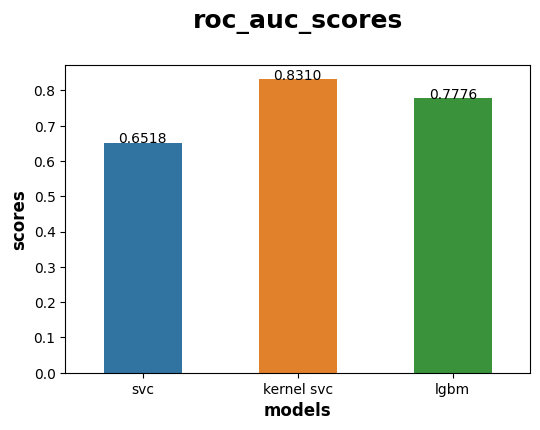

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))

x = ['svc', 'kernel svc', 'lgbm']
y = [np.mean(cv_scores[0]), np.mean(cv_scores[1]), np.mean(cv_scores[2])]

sns.barplot(x=x, y=y, width=0.5)
plt.title("roc_auc_scores\n", fontweight='bold', fontsize=18)
plt.xlabel('models', fontweight='bold', fontsize=12)
plt.ylabel('scores', fontweight='bold', fontsize=12)
for i, j in zip([0, 1, 2], y):
    plt.text(i, j, s=f'{j:.4f}', ha='center')